<a href="https://colab.research.google.com/github/PAYAL980/Matrix-Product-States-Preparation-/blob/main/MPS_Prep_%26_Benchmarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import timeit
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft as fft_np
from scipy.fftpack import fft as fft_sp

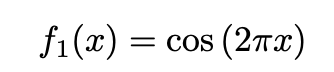

In [ ]:
# 1st cosine function

def f1(x):
    return np.cos(2*np.pi*x)

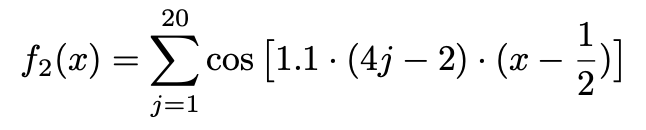

In [ ]:
# 20 cosine function

def f2(x):
    fun = 0
    for iz in range(1,21):
        fun += np.cos(1.1*(4*iz-2)*(x - 0.5))

    return fun

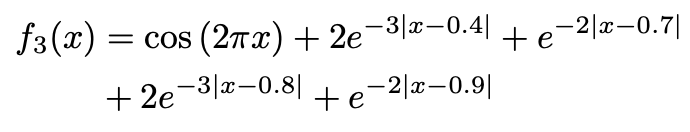

In [ ]:
# 1 cosine + cusps function

def f3(x):

    fun = np.cos(2*np.pi*x) + 2*np.exp(-3*np.abs(x-0.4)) + np.exp(-2*np.abs(x-0.7)) + 2*np.exp(-3*np.abs(x-0.8)) + np.exp(-2*np.abs(x-0.9))

    return fun

In [ ]:
## Function for estimating the state prep time for classical fft

def f_time(num_points, sampling_rate, f, which_fun):

    # Creating Signal using the 'f' function
    # X = np.arange(0,1, 1.0/u)

    u = sampling_rate

    X = np.arange(0,1, step=1/num_points)
    Y = [f(X[iz]) for iz in range(len(X))]

    # Measuring time

    # if which_fun=='np':
    #     start = timeit.default_timer()
    #     # print("The start time is :", start)

    #     res_X = fft_np(Y)

    #     k = timeit.default_timer() - start
    #     print("The time took to perform fft for ", num_points, " data points is :",k, 'seconds.')

    # if which_fun=='sp':
    #     start = timeit.default_timer()
    #     # print("The start time is :", start)

    #     res_X = fft_sp(Y)

    #     k = timeit.default_timer() - start
    #     print("The took to perform fft for ", num_points, " data points is :",k, 'seconds.')

    # Frequency for plotting fft function

    # N = len(res_X)
    # # n = np.arange(N)
    # n = np.arange(N)
    # T = N/u
    # freq = n/T

    # # Plotting before and after 'fft'

    # plt.figure(figsize=(16, 3))
    # plt.subplot(121)
    # plt.plot(X,Y, 'r')
    # plt.xlabel('x')
    # plt.ylabel('f(x)')
    # plt.title('Original function')
    # plt.subplot(122)
    # plt.plot(freq, np.abs(res_X))
    # plt.xlabel('freq')
    # plt.ylabel('fft(f(x))')
    # plt.title('After fft')

    # Returns the time elapsed during fft

    return 0

In [ ]:
time_array4 = []  # array for storing time
qubits = [] # array to store index of qubit

# Example

for iz in range(2, 14):

    dt_points = 2**(2*iz)

    qubits.append(2*iz)
    start = timeit.default_timer()
    f_time(num_points=dt_points, sampling_rate=200, f=f1, which_fun='np')
    k = timeit.default_timer() - start


    time_array4.append(k)

In [ ]:
time_array4

[0.00023619200010216446,
 0.00021167800002785953,
 0.0007777380000106859,
 0.003012702999967587,
 0.012095549000036954,
 0.029128462000016953,
 0.20993388199997298,
 0.7473407270000507,
 3.1961356350000187,
 7.453651591999915,
 35.55160055700003,
 134.99322684700007]

Text(0, 0.5, 'Time in seconds')

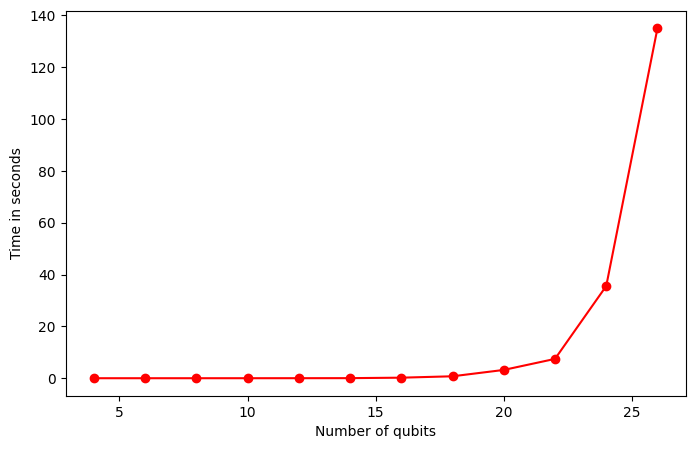

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(qubits, time_array4, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
# plt.xticks(qubits_20cos)

## MPS

In [ ]:
pip install quimb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.2/449.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
from quimb import *
from quimb.tensor.tensor_1d import MatrixProductState
import numpy as np
import time
import timeit
from matplotlib import pyplot as plt

In [ ]:
''' Function to create an array to be used as input for the polynomial function '''

def input_to_fun(start, stop, num_of_qubits):

    return np.arange(start, stop, step=1/(2**num_of_qubits))

In [ ]:
''' define the polynomial function here '''

def polynomial_fun(which_fun, x):

    if which_fun==1:
        fun = f1(x)
    # fun = np.cos(2*pi*x)
    if which_fun==2:
        fun = f2(x)

    if which_fun==3:
        fun = f3(x)

    return fun

In [ ]:
''' Function to create MPS

       num_of_qubits: int
                    number of qubits/sites
       start: int
              start of the range for the input function
       stop : int
              end of the range for the input function
       cutoff: float
              cutoff for trunction svd
       which_fun: 1 or 2 or 3
              1: f1(x)
              2: f2(x)
              3: f3(x)'''

def function_to_mps(num_of_qubits, start, stop, cutoff, which_fun, max_bond_dim=None):

    inputToFun =  input_to_fun(start, stop, num_of_qubits)

    state = polynomial_fun(which_fun, inputToFun)

    psi = MatrixProductState.from_dense(state, dims= [2]*num_of_qubits, method = 'svd', cutoff = cutoff, absorb = 'right', max_bond = max_bond_dim)

    return psi

### Cosine function

For  4 qubits, the time to create MPS is  0.0008576170000651473


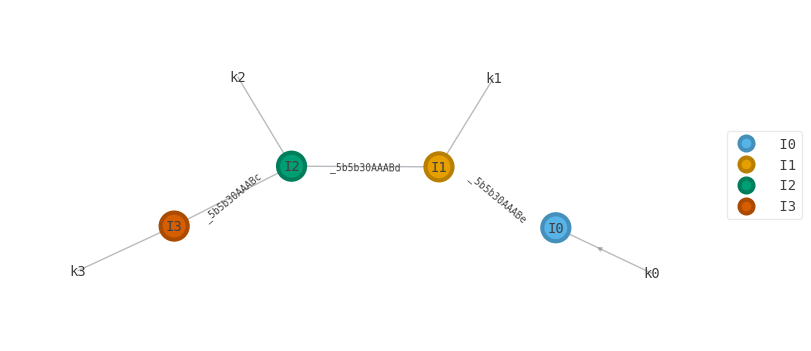

For  6 qubits, the time to create MPS is  0.0010057720000986592


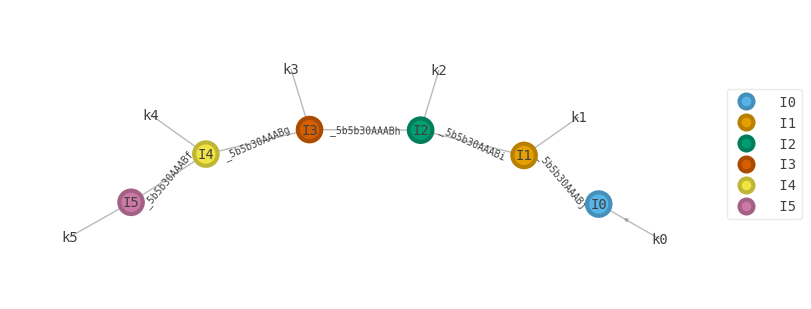

For  8 qubits, the time to create MPS is  0.0016095109999696433


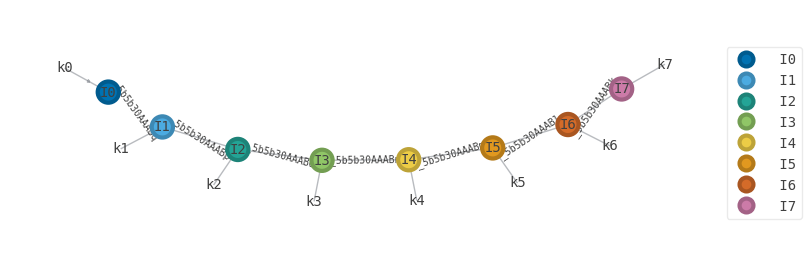

For  10 qubits, the time to create MPS is  0.002261951000036788


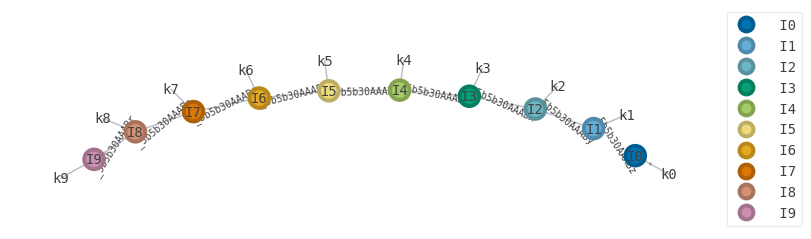

For  12 qubits, the time to create MPS is  0.0036090109999804554


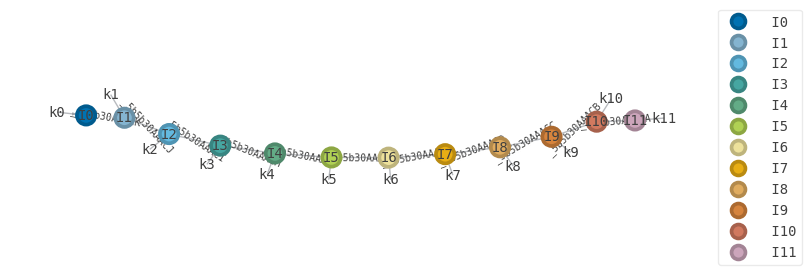

For  14 qubits, the time to create MPS is  0.009331212999995842


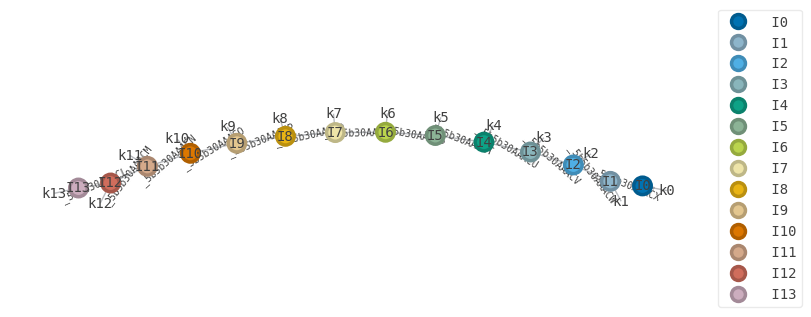

For  16 qubits, the time to create MPS is  0.010768226999971375


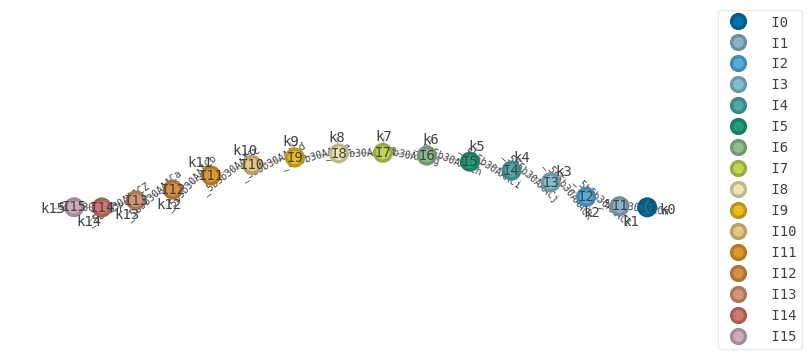

For  18 qubits, the time to create MPS is  0.03844081200008986


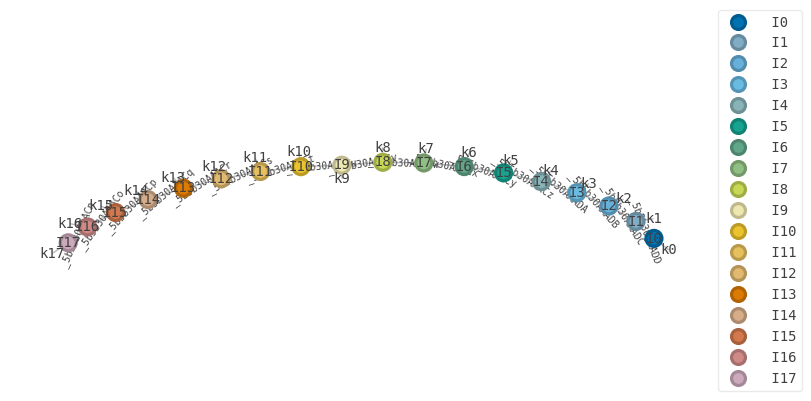

For  20 qubits, the time to create MPS is  0.1646570039999915


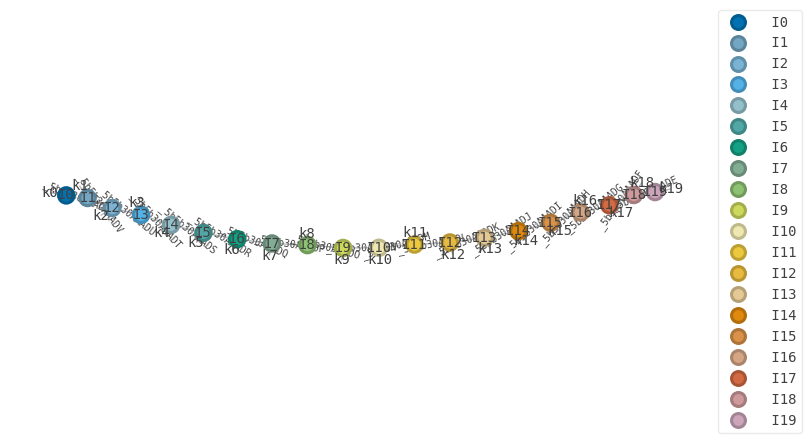

For  22 qubits, the time to create MPS is  0.8091366369999378


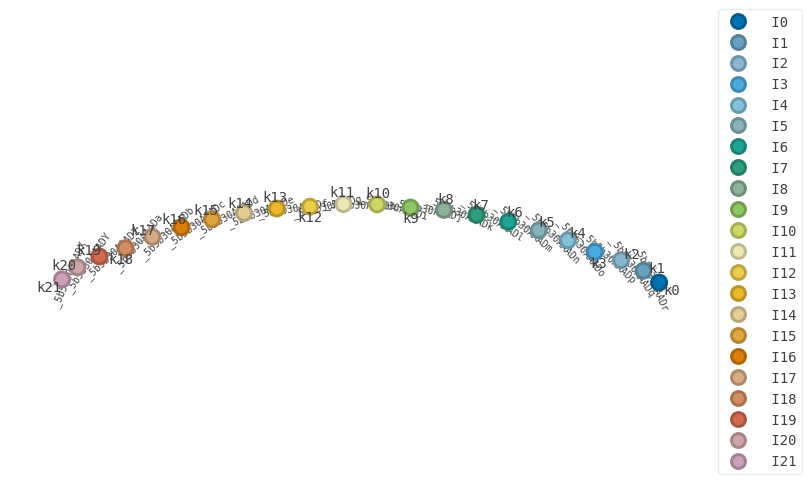

For  24 qubits, the time to create MPS is  1.5399091919998682


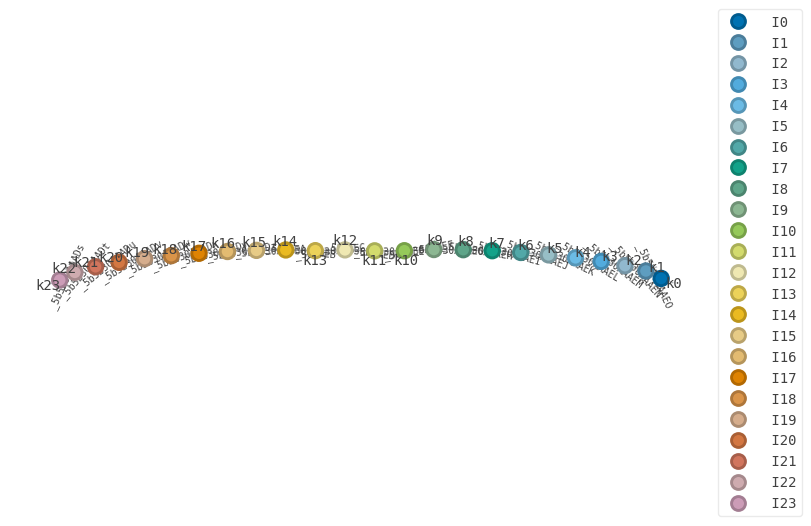

For  26 qubits, the time to create MPS is  5.326982212000075


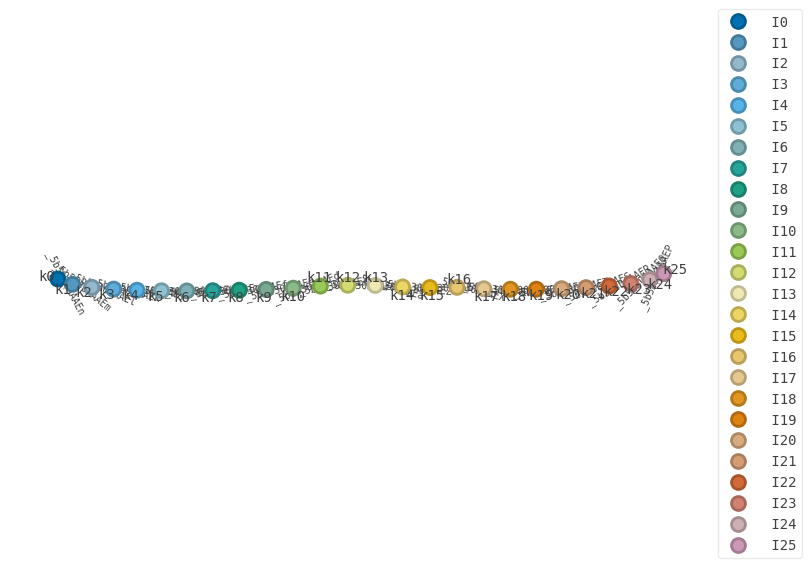

In [ ]:
time_array_cos4 = []  # array for storing time
qubits_cos = [] # array to store index of qubit

# For cos(2pi x) function
for iz in range(2, 14):

    start = timeit.default_timer()

    psi1 = function_to_mps(num_of_qubits=2*iz, start=0, stop=1, cutoff=1e-12, which_fun=1, max_bond_dim=2)

    k = timeit.default_timer() - start

    time_array_cos4.append(k)
    qubits_cos.append(2*iz)

    print("For ", 2*iz, "qubits, the time to create MPS is ", k)
    psi1.draw(color=[f'I{i}' for i in range(2*iz)], show_inds='all', figsize=(8, 6))

Text(0, 0.5, 'Time in seconds')

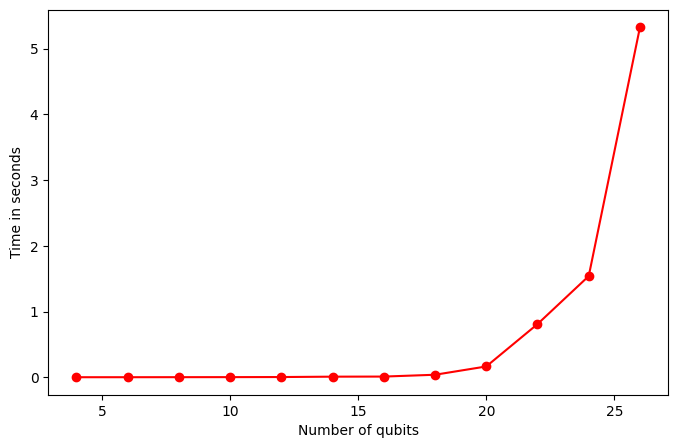

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(qubits_cos, time_array_cos4, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
# plt.xticks(qubits_cos)

### 20 cosine function

For  4 qubits, the time to create MPS is  0.001011915999924895


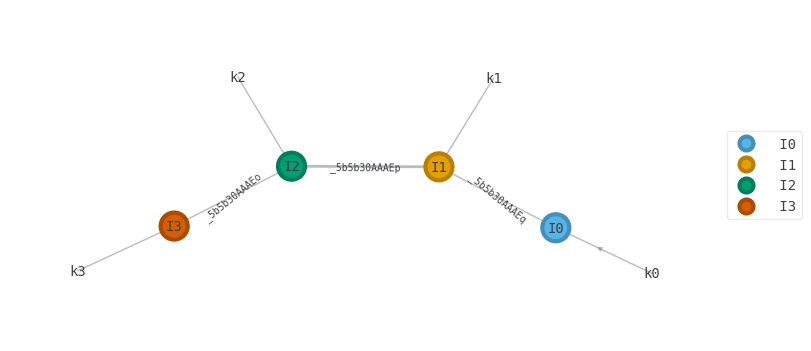

For  6 qubits, the time to create MPS is  0.0015454809999937424


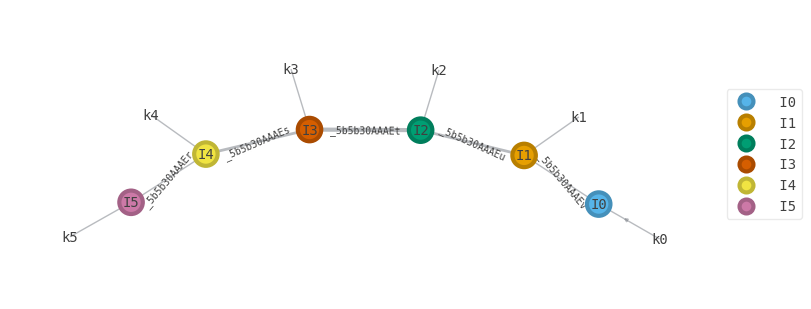

For  8 qubits, the time to create MPS is  0.001746390999869618


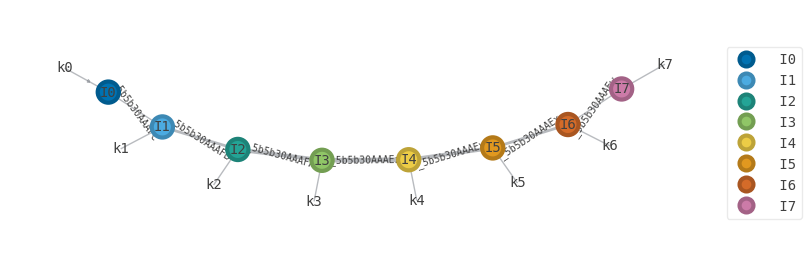

For  10 qubits, the time to create MPS is  0.0033627180000621593


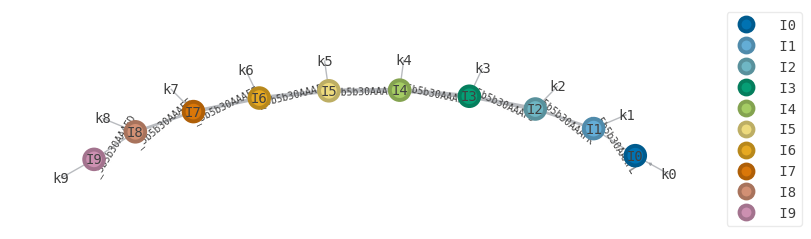

For  12 qubits, the time to create MPS is  0.00896024500002568


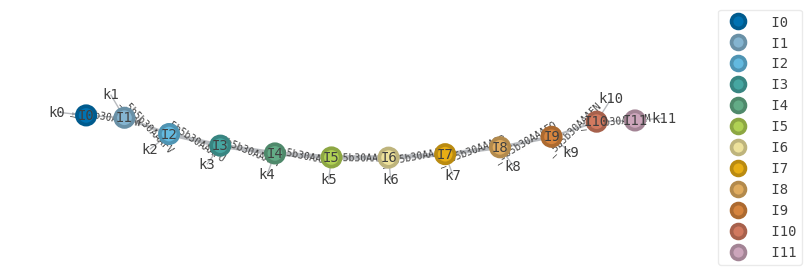

For  14 qubits, the time to create MPS is  0.021950346999801695


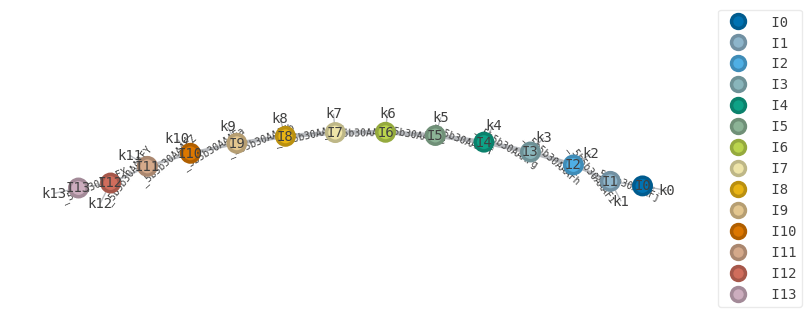

For  16 qubits, the time to create MPS is  0.045801758999914455


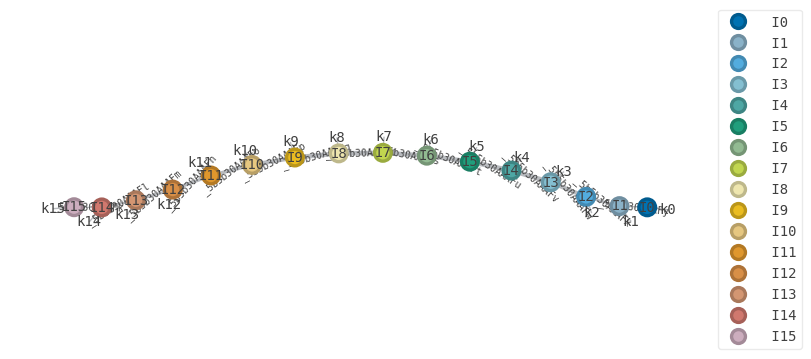

For  18 qubits, the time to create MPS is  0.2076284959998702


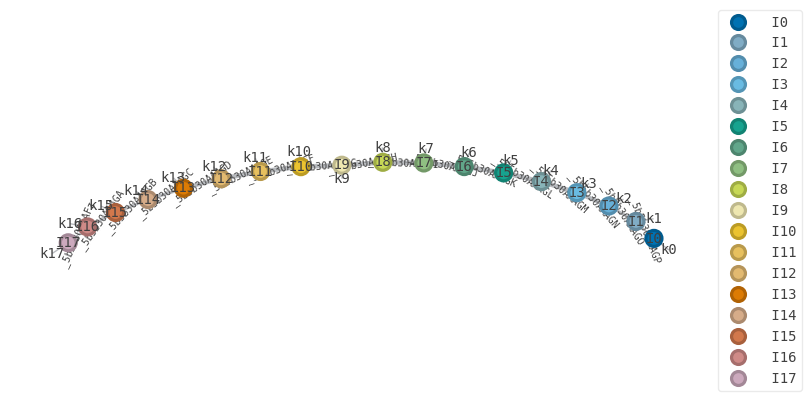

For  20 qubits, the time to create MPS is  0.8696916070000498


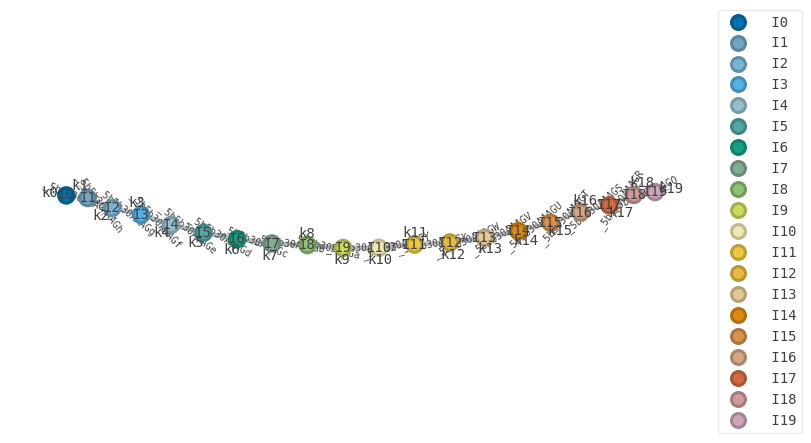

For  22 qubits, the time to create MPS is  2.4212651949999326


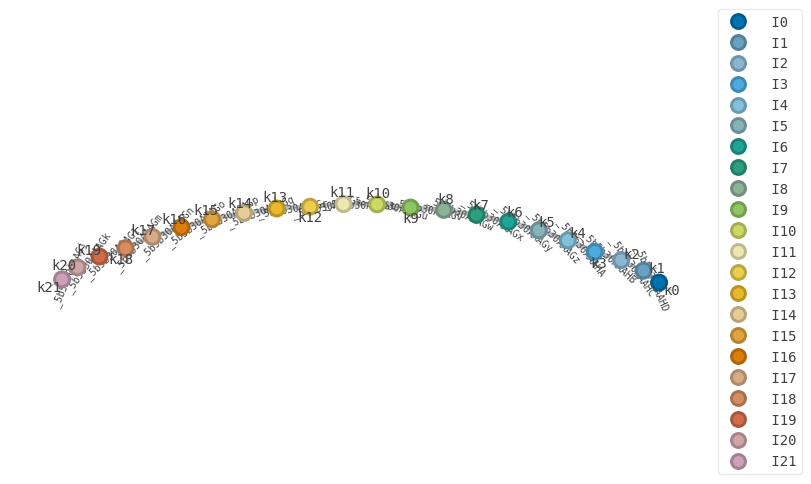

For  24 qubits, the time to create MPS is  10.614860575999955


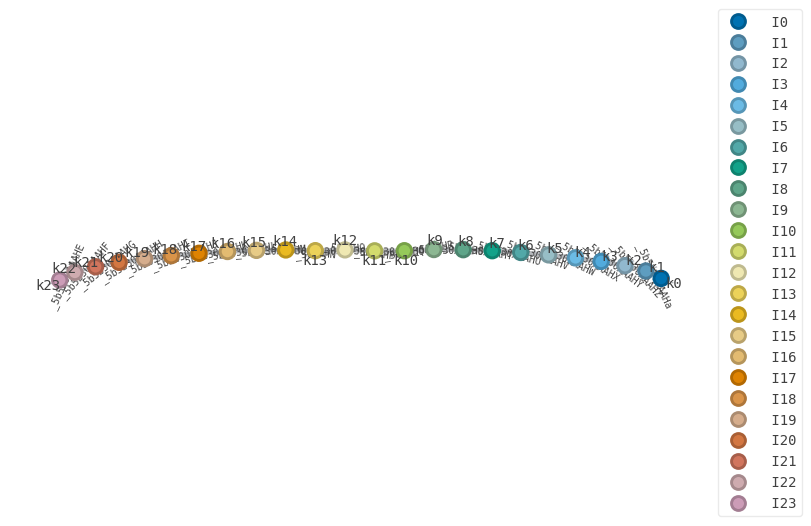

For  26 qubits, the time to create MPS is  35.104114869000114


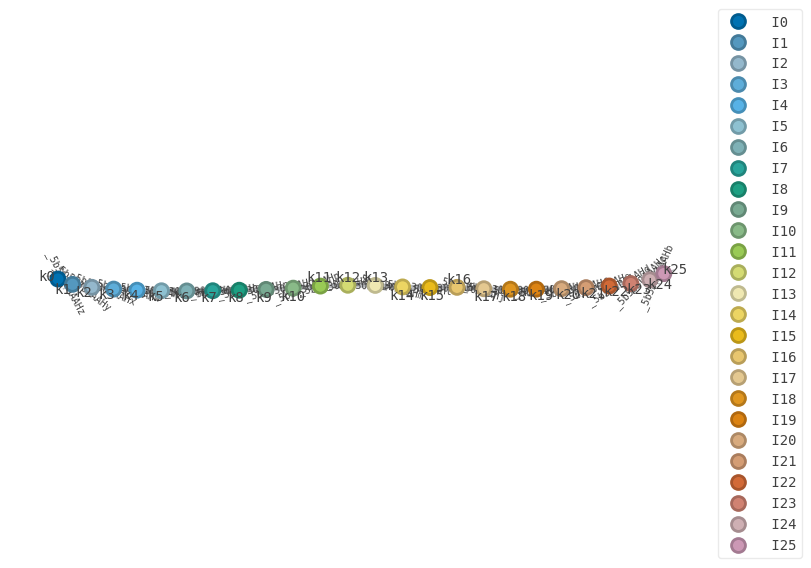

In [ ]:
time_array_20cos4 = []  # array for storing time
qubits_cos = [] # array to store index of qubit

# For cos(2pi x) function
for iz in range(2, 14):

    start = timeit.default_timer()

    psi1 = function_to_mps(num_of_qubits=2*iz, start=0, stop=1, cutoff=1e-12, which_fun=2, max_bond_dim=10)

    k = timeit.default_timer() - start

    time_array_20cos4.append(k)
    qubits_cos.append(2*iz)

    print("For ", 2*iz, "qubits, the time to create MPS is ", k)
    psi1.draw(color=[f'I{i}' for i in range(2*iz)], show_inds='all', figsize=(8, 6))

Text(0, 0.5, 'Time in seconds')

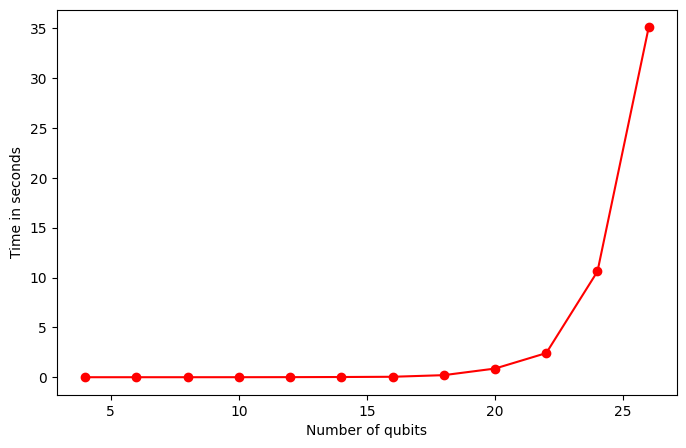

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(qubits_cos, time_array_20cos4, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
# plt.xticks(qubits_cos)

### Cosine + cusp function

For  4 qubits, the time to create MPS is  0.004562268999961816


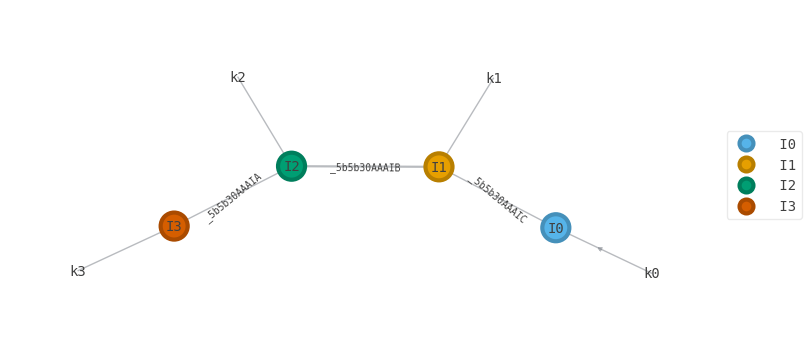

For  6 qubits, the time to create MPS is  0.004916388999845367


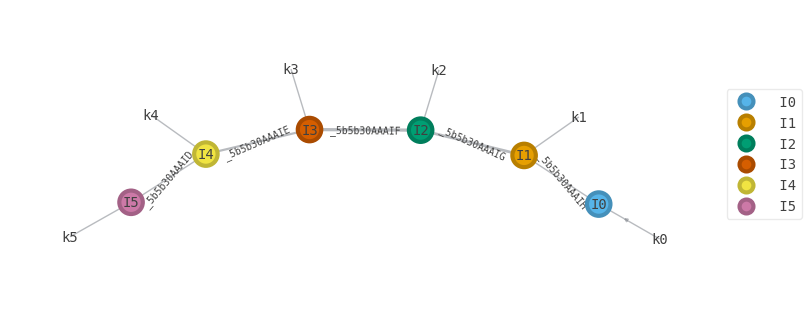

For  8 qubits, the time to create MPS is  0.0013023429999066138


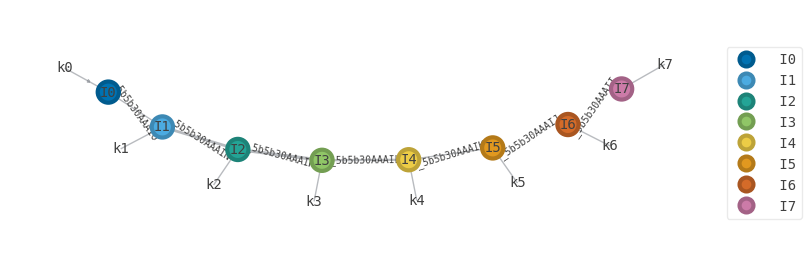

For  10 qubits, the time to create MPS is  0.002143595000006826


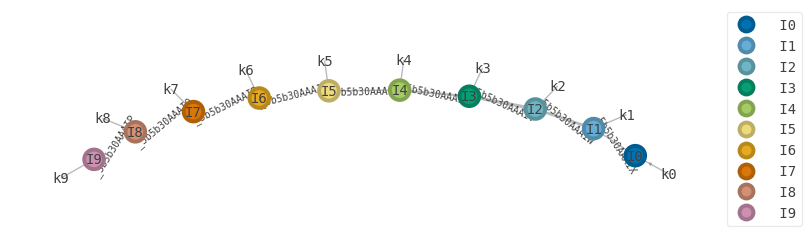

For  12 qubits, the time to create MPS is  0.004573237999920821


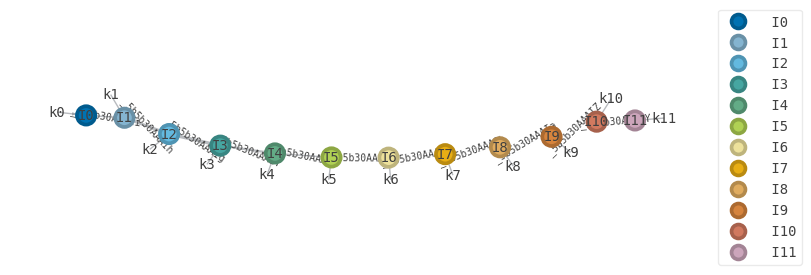

For  14 qubits, the time to create MPS is  0.006949928000040018


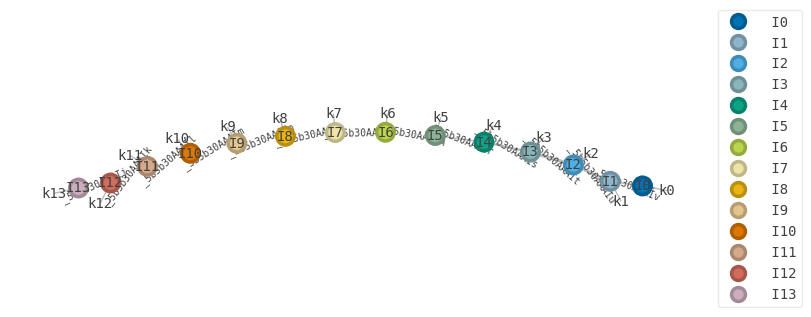

For  16 qubits, the time to create MPS is  0.01863889899982496


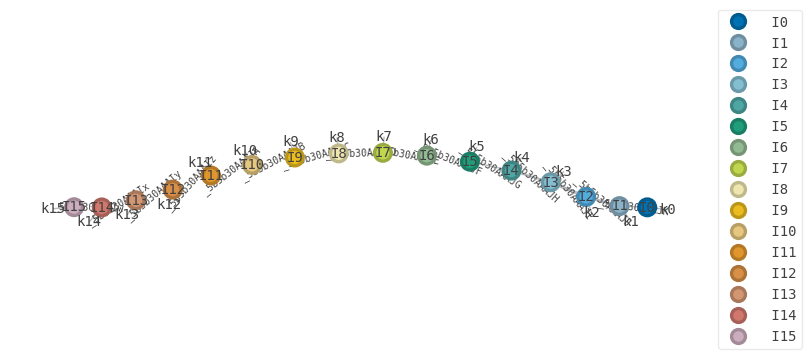

For  18 qubits, the time to create MPS is  0.042774792000045636


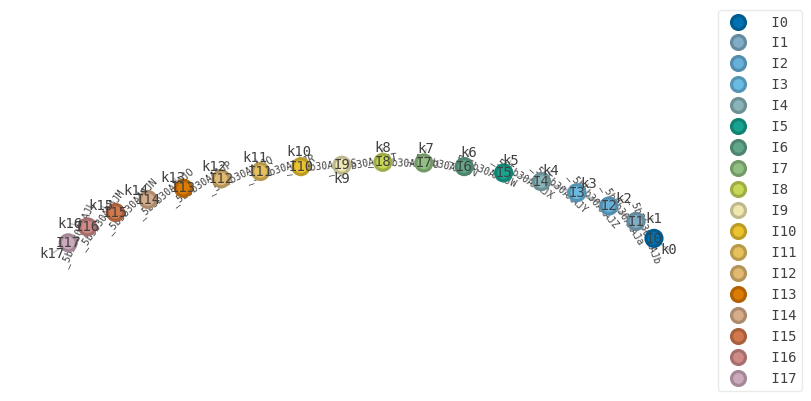

For  20 qubits, the time to create MPS is  0.1372000650001155


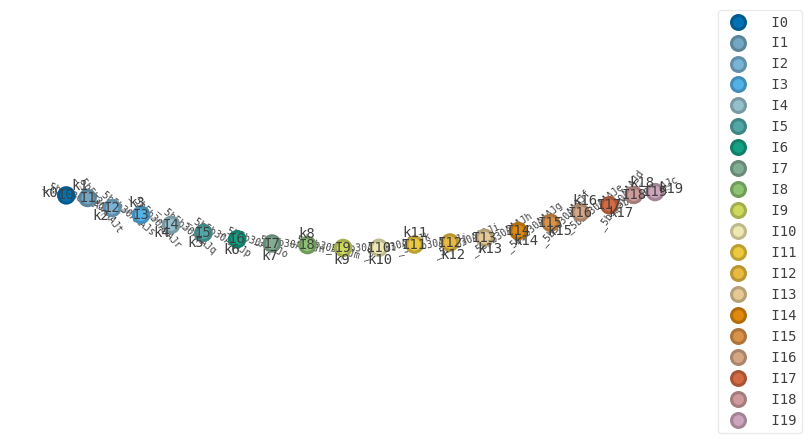

For  22 qubits, the time to create MPS is  0.592713705000051


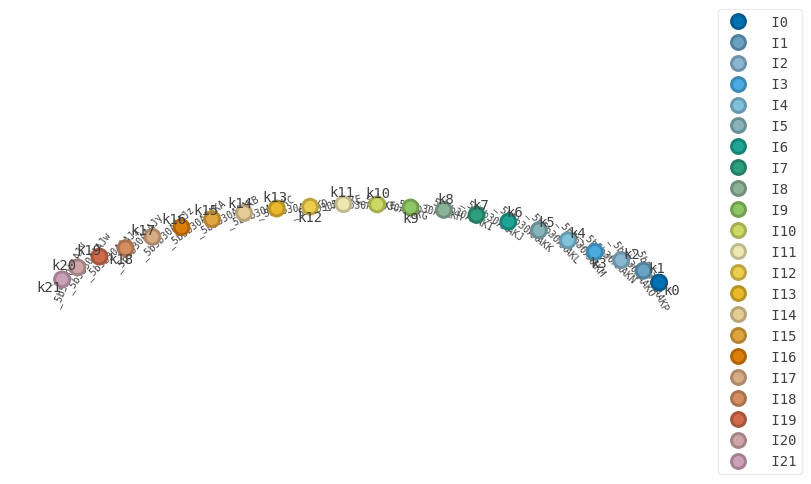

For  24 qubits, the time to create MPS is  2.3762803780000468


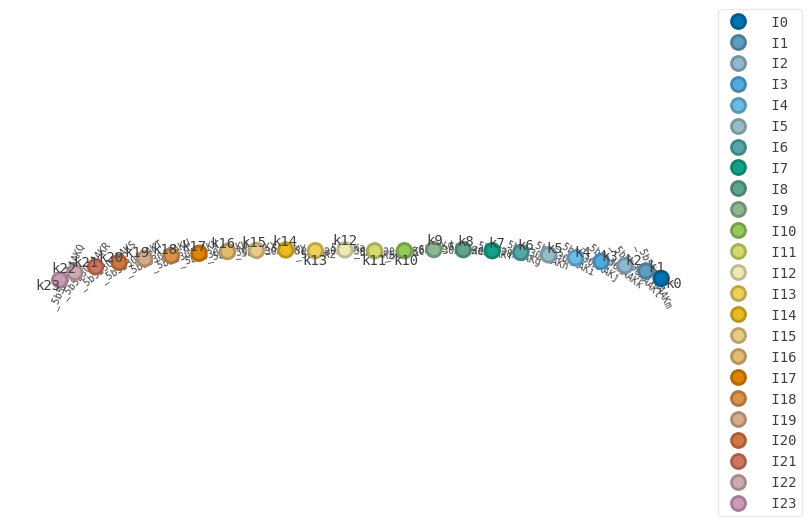

For  26 qubits, the time to create MPS is  10.282802017999984


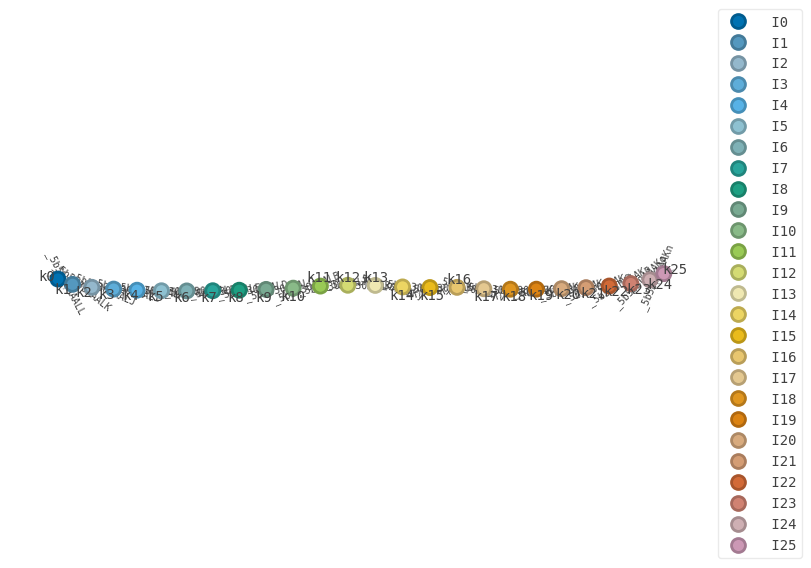

In [ ]:
time_array_cusp4 = []  # array for storing time
qubits_cusp = [] # array to store index of qubit

# For cosine + cusp function
for iz in range(2, 14):

    start = timeit.default_timer()

    psi1 = function_to_mps(num_of_qubits=2*iz, start=0, stop=1, cutoff=1e-4, which_fun=3, max_bond_dim=10)

    k = timeit.default_timer() - start

    time_array_cusp4.append(k)
    qubits_cusp.append(2*iz)

    print("For ", 2*iz, "qubits, the time to create MPS is ", k)
    psi1.draw(color=[f'I{i}' for i in range(2*iz)], show_inds='all', figsize=(8, 6))

Text(0, 0.5, 'Time in seconds')

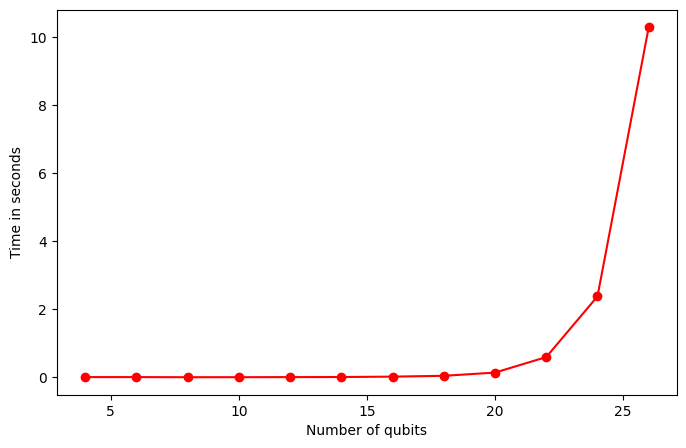

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(qubits_cos, time_array_cusp4, 'ro-')
plt.xlabel("Number of qubits")
plt.ylabel("Time in seconds")
# plt.xticks(qubits_cos)

### All in one

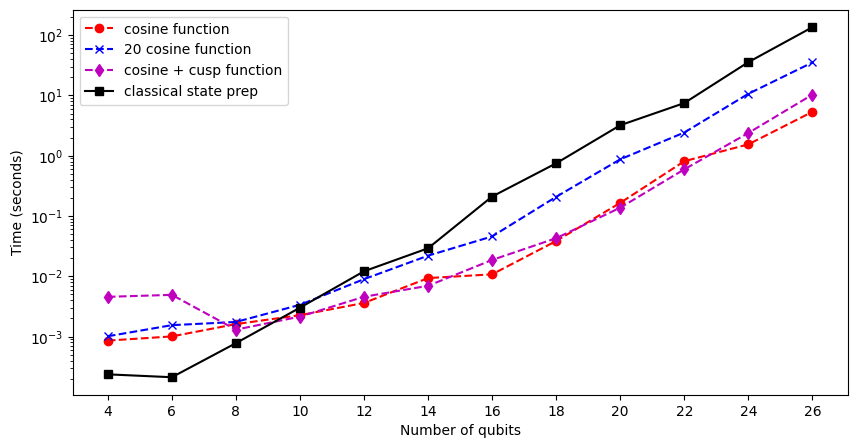

In [ ]:
plt.figure(figsize=(10,5))
plt.semilogy(qubits_cos, time_array_cos4, 'ro--')
plt.semilogy(qubits_cusp, time_array_20cos4, 'bx--')
plt.semilogy(qubits_cusp, time_array_cusp4, 'md--')
plt.semilogy(qubits_cos, time_array4, 'ks-')
plt.xticks(qubits_cusp)
plt.xlabel("Number of qubits")
plt.ylabel("Time (seconds)")
plt.legend(['cosine function', '20 cosine function', 'cosine + cusp function', 'classical state prep'])